In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Clustering\\EastWestAirlines.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df_1=df.drop(['ID#'],axis=1)

In [6]:
array=df_1.values

In [7]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as numpy
import matplotlib.pyplot as plt 

In [9]:
stscaler=StandardScaler().fit(array)    ## normalize
#stscaler
x=stscaler.transform(array)             
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [10]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=7)

nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)
distances,indices

(array([[0.        , 0.11184685, 0.12034246, ..., 0.13743209, 0.14344808,
         0.14968945],
        [0.        , 0.11406276, 0.11437601, ..., 0.13743209, 0.14330122,
         0.14928592],
        [0.        , 0.16540223, 0.19458949, ..., 0.21935697, 0.25910823,
         0.29632823],
        ...,
        [0.        , 0.16614779, 0.28024323, ..., 0.59813199, 0.72298879,
         0.75909225],
        [0.        , 0.25725534, 0.27167409, ..., 0.35888565, 0.44722732,
         0.4525372 ],
        [0.        , 0.00270574, 0.0112955 , ..., 0.0233006 , 0.04050268,
         0.05918244]]),
 array([[   0,  378,  363, ...,    1,  316,  337],
        [   1,    3,  363, ...,    0,  350,  316],
        [   2,  338,  368, ...,   13,   98,  217],
        ...,
        [3996, 3877, 3800, ..., 3624, 2690, 3871],
        [3997, 3623, 3882, ..., 3414, 3802, 3970],
        [3998, 3491, 3455, ..., 3981, 3454, 3374]], dtype=int64))

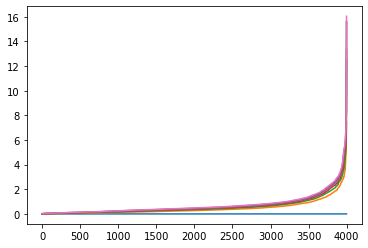

In [11]:
import numpy as np
distances=np.sort(distances,axis=0)
#distances=distances[:,1:6]
plt.plot(distances)
#distances.shape
plt.show()

In [59]:
# Apply dbscan
dbscan=DBSCAN(eps=3,min_samples=12)
dbscan
dbscan.fit(x)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusters'])
cl;

NameError: name 'pd' is not defined

In [1]:
data2=pd.concat([df,cl],axis=1)
data2;

NameError: name 'pd' is not defined

In [62]:
data2.groupby(['clusters']).count()   ## to find % of outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,,,,,
-1,87,87,87,87,87,87,87,87,87,87,87,87
0,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874
1,25,25,25,25,25,25,25,25,25,25,25,25
2,13,13,13,13,13,13,13,13,13,13,13,13


In [65]:
(87/4999)*100     # 1.74% datapoints are outliers

1.7403480696139229

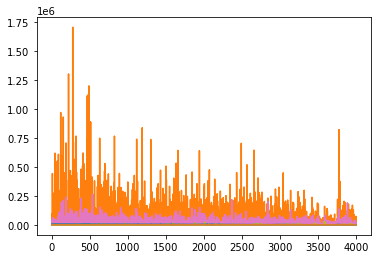

In [54]:
plt.plot(df)